In [1]:
import pandas as pd
import numpy as np

from neurotools.stats.permutations import permuted_v
from neurotools.loading.abcd import load_from_csv, load_family_block_structure

- Load data

For this example problem, we will just use a set of thickness ROI's, just family id as the block structure, and a single confounding variable of sex, and let's say neurocog1 as our target variable.

In [2]:
# Get possible columns
csv_loc = '/home/sage/benchmark_methods/data/nda3.0.csv'
all_cols = list(pd.read_csv(csv_loc, nrows=0))

# Load thickness ROI data - ignore hemi and full mean for plotting
thick = [col for col in all_cols if 'smri_thick_cort.destrieux' in col and '_mean' not in col]

# Rest of needed columns
rest = ['C(sex_at_birth)', 'neurocog_pc1.bl', 'C(rel_family_id)']

# Load in all together
data = load_from_csv(cols=thick+rest, csv_loc=csv_loc, drop_nan=True)

Note the parameter within_grp. If set to True, then means swaps will only be performed within group, so in terms of family, that means the only swaps that would take place are within families, swapping siblings data with each other. If set to False, which we do in this example, it instead means that swaps occur between groups, so every singleton family is freely swapped with other singleton families, but any family of size 2, can only be swapped with another family of size 2.

See: https://sahahn.github.io/neurotools/stats.html#permutations-permuted-v
For more information on this method.

In [3]:
pvals, original_scores, h0_vmax = permuted_v(tested_vars=data['neurocog_pc1.bl'],
                                             target_vars=data[thick],
                                             confounding_vars=data['sex_at_birth'],
                                             permutation_structure=data[['rel_family_id']],
                                             within_grp=False,
                                             n_perm=10,
                                             n_jobs=4,
                                             verbose=1)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  1.6min remaining:  1.6min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.9min finished


In [4]:
np.unique(np.unique(data['rel_family_id'], return_counts=True)[1])

array([1, 2, 3, 5])

In [5]:
from neurotools.plotting import SurfRef, plot

def to_vertex(vals, names, space='fsaverage5'):
    '''Helper function to convert destr. ROIs to vertex space'''
    
    plot_df = pd.DataFrame(vals, columns=['vals'])
    plot_df['names'] = names

    surf_ref = SurfRef(space=space, parc='destr')
    plot_data = surf_ref.get_hemis_plot_vals(plot_df, lh_key='.lh', rh_key='.rh')
    
    return plot_data

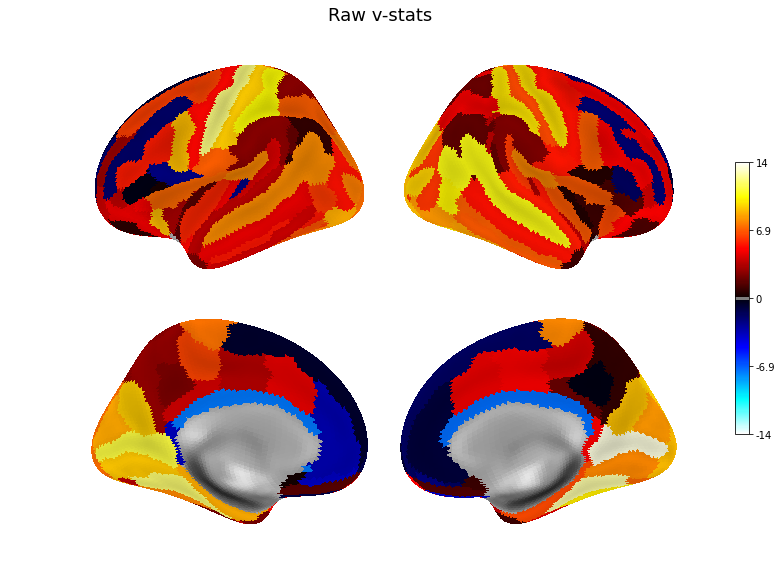

In [6]:
roi_names = list(data[thick])
v = to_vertex(original_scores, roi_names)
plot(v, title='Raw v-stats', threshold=.1)

In [7]:
original_scores

array([-3.4774705 , -1.06784458,  4.6931285 ,  4.83433142,  3.64362008,
        4.98716148,  3.81099275,  5.01093309,  8.5387233 ,  8.17811986,
        7.34160268,  7.85486275,  6.93325362,  5.48962523, -1.2290862 ,
       -0.82474217,  4.14729736,  1.94971226, -3.77355713,  4.8870938 ,
        8.49168381,  8.12614744, -2.41004173,  0.53647808,  4.35895915,
        1.58948963, -0.21319916, -1.62003768, -1.85694939, -2.06383539,
       -0.64963302, -1.8209871 ,  1.54615832,  0.48902083,  3.19954136,
        0.98629812,  5.36985739,  6.10065612,  7.25097283,  9.29341113,
        7.78191052,  9.89241798,  9.14711576,  7.7722938 ,  8.51951876,
        6.49858488,  4.4275441 ,  5.0520834 ,  2.61652677,  1.97161181,
        0.81994665,  1.80328723,  2.59863403,  2.41966115,  9.24192925,
        6.49461845,  5.17021364,  5.327784  ,  2.90212661,  0.80771973,
        1.57506738,  1.49991585,  0.11171486,  0.97691496,  4.01286562,
        6.83171819,  4.5543032 ,  5.33778429,  4.71363209,  5.41

In [8]:
h0_vmax

array([2.46447976, 3.35936128, 2.17648211, 2.34575451, 2.4076156 ,
       2.65949851, 2.2201779 , 4.57397219, 3.8121694 , 2.43750636])